In [1]:
import pandas as pd

In [2]:
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
def converte_classe(rotule):
    if rotule == ' >50k':
        return 1
    else:
        return 0
    



In [6]:
base['income'] = base['income'].apply(converte_classe)

In [7]:
base['income']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
32531    0
32532    0
32533    0
32534    0
32535    0
32536    0
32537    0
32538    0
32539    0
32540    0
32541    0
32542    0
32543    0
32544    0
32545    0
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    0
32556    0
32557    0
32558    0
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [9]:
base['income'].unique()

array([0], dtype=int64)

In [14]:
x = base.drop('income', axis=1)
x.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [12]:
y  = base['income']

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

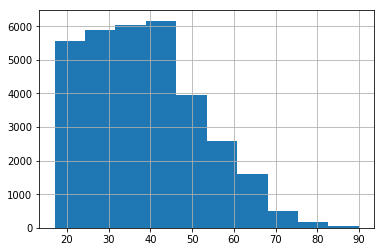

In [16]:
%matplotlib inline
base.age.hist()

In [17]:
import tensorflow as tf

In [18]:
idade = tf.feature_column.numeric_column('age')

In [20]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20, 30, 40, 50, 60, 70, 80, 90])]

In [21]:
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [23]:
x.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [26]:
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [27]:
x['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
x['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [30]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=x[c].unique()) for c in nome_colunas_categoricas]

In [31]:
print(colunas_categoricas)

[VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sal

In [33]:
print(colunas_categoricas[0])

VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [37]:
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [38]:
colunas_numericas = [tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas]

In [39]:
print(colunas_numericas[0])

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [40]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [41]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.3)

In [42]:
x_treinamento.shape

(22792, 14)

In [44]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = x_treinamento, y = y_treinamento, batch_size = 32, num_epochs = None, shuffle=True)

In [45]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vitor\\AppData\\Local\\Temp\\tmpqbtffbb0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DB0EC32438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
classificador.train(input_fn=funcao_treinamento, steps= 10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\vitor\AppData\Local\Temp\tmpqbtffbb0\model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 67.1346
INFO:tensorflow:loss = 0.0, step = 101 (1.506 sec)
INFO:tensorflow:global_step/sec: 169.134
INFO:tensorflow:loss = 0.0, step = 201 (0.582 sec)
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 217.99
INFO:tensorflow:loss = 0.0, step = 6501 (0.461 sec)
INFO:tensorflow:global_step/sec: 227.92
INFO:tensorflow:loss = 0.0, step = 6601 (0.437 sec)
INFO:tensorflow:global_step/sec: 201.323
INFO:tensorflow:loss = 0.0, step = 6701 (0.497 sec)
INFO:tensorflow:global_step/sec: 228.964
INFO:tensorflow:loss = 0.0, step = 6801 (0.439 sec)
INFO:tensorflow:global_step/sec: 216.574
INFO:tensorflow:loss = 0.0, step = 6901 (0.463 sec)
INFO:tensorflow:global_step/sec: 117.3
INFO:tensorflow:loss = 0.0, step = 7001 (0.861 sec)
INFO:tensorflow:global_step/sec: 70.3143
INFO:tensorflow:loss = 0.0, step = 7101 (1.430 sec)
INFO:tensorflow:global_step/sec: 76.3213
INFO:tensorflow:loss = 0.0, step = 7201 (1.301 sec)
INFO:tensorflow:global_step/sec: 75.458
INFO:tensorflow:loss = 0.0, step = 7301 (1.327 sec)
INFO:tensorflow:global_step/sec: 59.9504
INFO:tensorflow:loss = 0.0, step = 7401 (1.672 sec)
INFO:tensorflow:global_step/sec: 67.3332
INFO:tensorflow:loss = 0.0, step =

In [47]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = x_teste, batch_size=32, shuffle = False)

In [48]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [49]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\vitor\AppData\Local\Temp\tmpqbtffbb0\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-56533.395], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-17478.764], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-29802.594], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-18881.994], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-82920.96], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilitie

In [50]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vitor\AppData\Local\Temp\tmpqbtffbb0\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [51]:
previsoes_final

[array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], 

In [52]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes_final)

In [53]:
taxa_acerto

1.0